데이터 전처리 과정
==================

사용한 변수명
=========
- path : csv 파일 불러오기
- df : 데이터프레임화
- missing : 결측치 확인
- columns_check : 이상치를 확인할 컬럼 리스트화
- column_plot : 시각화할 부분 컬럼
- combine_dongs : 합칠 동들 리스트
- cleaned_data : 이상치 제거
- selected_columns : 필요한 열

- 소득소비 : 이상치 제거전 df
- 소득소비_wout : 이상치 제거후 df

- 개포동_소득소비 : 개포동
- 논현동_소득소비 : 논현동
- 대치동_소득소비 : 대치동
- 도곡동_소득소비 : 도곡동
- 삼성동_소득소비 : 삼성동
- 세곡동_소득소비 : 세곡동
- 수서동_소득소비 : 수서동
- 신사동_소득소비 : 신사동
- 압구정동_소득소비 : 압구정동
- 역삼동_소득소비 : 역삼동
- 일원동_소득소비 : 일원동
- 청담동_소득소비 : 청담동

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [91]:
path = '../csv/소득소비-행정동.csv'
df = pd.read_csv(path, encoding = 'cp949')
pd.options.display.float_format = '{:}'.format
df.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,20231,11680660,개포1동,5336373,9,250506000.0,70320000.0,8632000,1380000,134557000,0.0,18870000,0,0.0,5140000.0,11607000
1,20231,11680690,개포4동,3550527,7,3535605000.0,905489000.0,67031000,248324000,642305000,158511000.0,176230000,47715000,246719000.0,328323000.0,714958000
2,20231,11680656,도곡2동,6567504,9,51201251000.0,1700247000.0,200892000,156300000,686581000,289318000.0,418130000,159125000,44699373000.0,543709000.0,2347576000
3,20231,11680630,대치4동,4101144,8,57804945000.0,2100242000.0,138814000,139295000,2597010000,1180671000.0,6228110000,673173000,2129640000.0,37289026000.0,5328964000
4,20231,11680700,세곡동,3885403,8,5656119000.0,1588747000.0,54639000,88871000,719191000,786913000.0,684494000,81232000,290703000.0,242007000.0,1119322000


데이터프레임 결측치 확인
======================

In [92]:
# 데이터프레임의 결측치를 확인
missing = df.isnull().sum()
print('결측치 확인')
print(missing)

결측치 확인
기준_년분기_코드       0
행정동_코드          0
행정동_코드_명        0
월_평균_소득_금액      0
소득_구간_코드        0
지출_총금액          0
식료품_지출_총금액      0
의류_신발_지출_총금액    0
생활용품_지출_총금액     0
의료비_지출_총금액      0
교통_지출_총금액       0
교육_지출_총금액       0
유흥_지출_총금액       0
여가_문화_지출_총금액    0
기타_지출_총금액       0
음식_지출_총금액       0
dtype: int64


In [93]:
column_check = '음식_지출_총금액'

threshold = 3

def detect_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[(df[column] - mean).abs() > threshold * std]
    return outliers

for dong_code in df['행정동_코드'].unique():
    # 해당 동의 데이터를 선택
    dong_data = df[df['행정동_코드'] == dong_code]
    
    # 해당 동의 이상치 확인
    outliers = detect_outliers(dong_data, column_check)
    
    if not outliers.empty:
        print(f"{dong_code} 동의 {column_check} 열의 이상치:")
        print(outliers)
        # 이상치에 대한 처리
    else:
        print(f"{dong_code} 동의 {column_check} 열에 이상치가 없습니다.") 

11680660 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680690 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680656 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680630 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680700 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680640 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680600 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680655 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680580 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680545 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680730 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680531 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680650 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680521 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680610 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680510 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680750 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680670 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680590 동의 음식_지출_총금액 열에 이상치가 없습니다.
11680565 동의 음식_지출_총금액 열에 이상치가 없습니다.


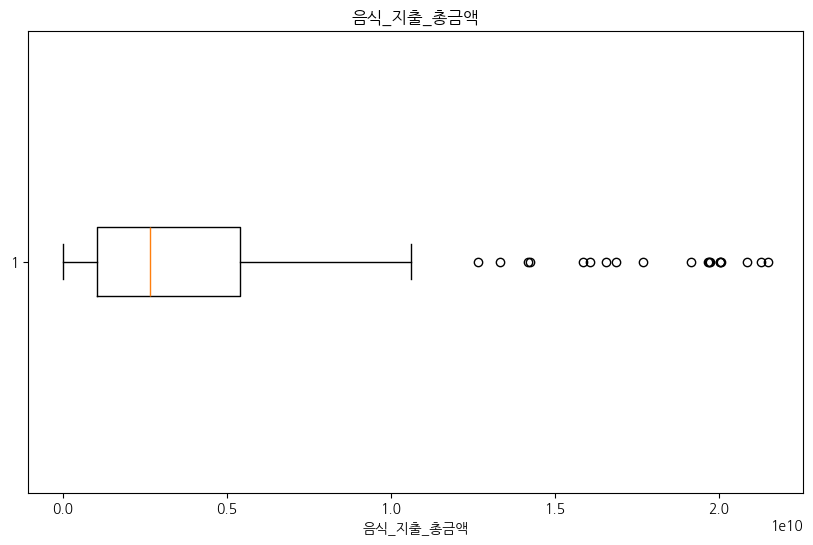

In [94]:
# 그림 그릴 열 선택
column_plot = '음식_지출_총금액'

# 상자 그림 생성
plt.figure(figsize=(10, 6),dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'
plt.boxplot(df[column_plot], vert=False)
plt.title(f'{column_plot}')
plt.xlabel(column_plot)
plt.show()

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = '../csv/소득소비-행정동.csv'
data = pd.read_csv(path, encoding = 'cp949')



In [96]:
# 필요한 열 선택
selected_columns = ['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '월_평균_소득_금액', '지출_총금액', '음식_지출_총금액']

# 동 이름에서 숫자 부분을 제외하고 그룹화하는 함수를 정의
def combine_dong(dong):
    return ''.join(filter(str.isalpha, dong))

# 동 이름에서 숫자 부분을 제외하고 그룹화합니다.
data['행정동_코드_명'] = data['행정동_코드_명'].apply(combine_dong)

# 필요한 열만 선택하고 동 이름에서 숫자 부분을 제외한 후 중복된 행을 제거
processed_data = data[selected_columns].drop_duplicates()

# 데이터 출력
print(processed_data)


     기준_년분기_코드    행정동_코드 행정동_코드_명  월_평균_소득_금액        지출_총금액   음식_지출_총금액
0        20231  11680660      개포동     5336373   250506000.0    11607000
1        20231  11680690      개포동     3550527  3535605000.0   714958000
2        20231  11680656      도곡동     6567504 51201251000.0  2347576000
3        20231  11680630      대치동     4101144 57804945000.0  5328964000
4        20231  11680700      세곡동     3885403  5656119000.0  1119322000
..         ...       ...      ...         ...           ...         ...
375      20224  11680700      세곡동     3885403  5929313000.0  1186333000
376      20224  11680580      삼성동     5098096 45380791000.0  6194988000
377      20224  11680750      수서동     3847379 76258364000.0  1510165000
378      20224  11680531      논현동     3973993 27525414000.0  6057481000
379      20224  11680600      대치동     7421305 11818927000.0  1125905000

[380 rows x 6 columns]


In [97]:
# processed_data.to_csv('소득소비_new.csv',encoding='utf-8-sig')

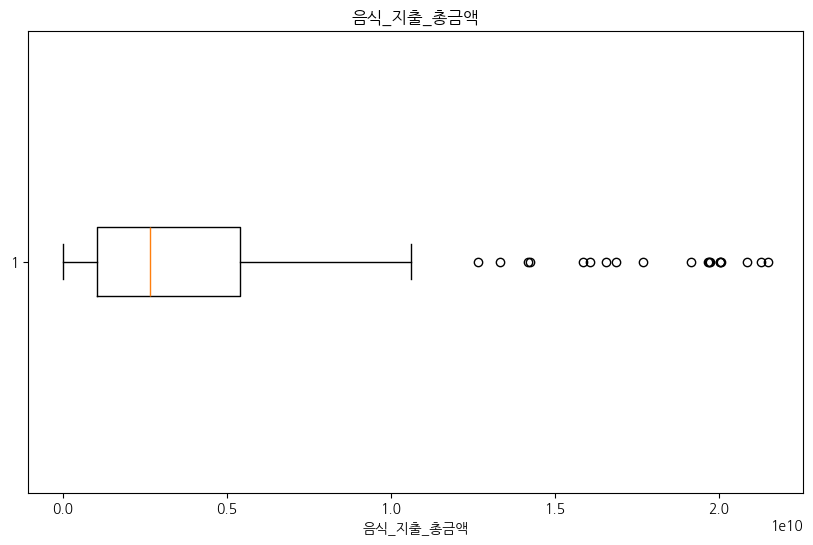

In [98]:
# 그림 그릴 열 선택
column_plot = '음식_지출_총금액'

# 상자 그림 생성
plt.figure(figsize=(10, 6),dpi=100)
plt.rcParams['font.family'] = 'NanumGothic'
plt.boxplot(processed_data[column_plot], vert=False)
plt.title(f'{column_plot}')
plt.xlabel(column_plot)
plt.show()

In [99]:
processed_data

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,지출_총금액,음식_지출_총금액
0,20231,11680660,개포동,5336373,250506000.0,11607000
1,20231,11680690,개포동,3550527,3535605000.0,714958000
2,20231,11680656,도곡동,6567504,51201251000.0,2347576000
3,20231,11680630,대치동,4101144,57804945000.0,5328964000
4,20231,11680700,세곡동,3885403,5656119000.0,1119322000
...,...,...,...,...,...,...
375,20224,11680700,세곡동,3885403,5929313000.0,1186333000
376,20224,11680580,삼성동,5098096,45380791000.0,6194988000
377,20224,11680750,수서동,3847379,76258364000.0,1510165000
378,20224,11680531,논현동,3973993,27525414000.0,6057481000


그룹화 된 데이터 전처리 과정
- 결측치 확인
- 이상치 확인
- 각 동별로 시각화

데이터프레임 정렬

In [100]:
소득소비 = processed_data.sort_values(by=['기준_년분기_코드','행정동_코드_명'])

In [101]:
print(소득소비)

    기준_년분기_코드    행정동_코드 행정동_코드_명  월_평균_소득_금액          지출_총금액    음식_지출_총금액
63      20191  11680690      개포동     3712505    2805396000.0    658155000
67      20191  11680660      개포동     4197165     189850000.0      6638000
70      20191  11680670      개포동     4892097    1485448000.0    334900000
60      20191  11680531      논현동     4160634   21567766000.0   4644390000
64      20191  11680521      논현동     3509309   43794594000.0   5644173000
..        ...       ...      ...         ...             ...          ...
49      20233  11680545     압구정동     5808537   43401170000.0   8985748000
45      20233  11680640      역삼동     3607265 1271150000000.0  19705893000
52      20233  11680650      역삼동     5367397  723587000000.0   3789260000
50      20233  11680730      일원동     3022931    2552402000.0    833488000
59      20233  11680565      청담동     5010204   32575816000.0   5912983000

[380 rows x 6 columns]


기본 정보 확인

In [102]:
print(소득소비.head())

    기준_년분기_코드    행정동_코드 행정동_코드_명  월_평균_소득_금액        지출_총금액   음식_지출_총금액
63      20191  11680690      개포동     3712505  2805396000.0   658155000
67      20191  11680660      개포동     4197165   189850000.0     6638000
70      20191  11680670      개포동     4892097  1485448000.0   334900000
60      20191  11680531      논현동     4160634 21567766000.0  4644390000
64      20191  11680521      논현동     3509309 43794594000.0  5644173000


In [103]:
print(소득소비.shape)

(380, 6)


In [104]:
print(소득소비.info())

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 63 to 59
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준_년분기_코드   380 non-null    int64  
 1   행정동_코드      380 non-null    int64  
 2   행정동_코드_명    380 non-null    object 
 3   월_평균_소득_금액  380 non-null    int64  
 4   지출_총금액      380 non-null    float64
 5   음식_지출_총금액   380 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 20.8+ KB
None


결측치 확인

In [105]:
print(소득소비.isnull().sum())

기준_년분기_코드     0
행정동_코드        0
행정동_코드_명      0
월_평균_소득_금액    0
지출_총금액        0
음식_지출_총금액     0
dtype: int64


이상치 확인

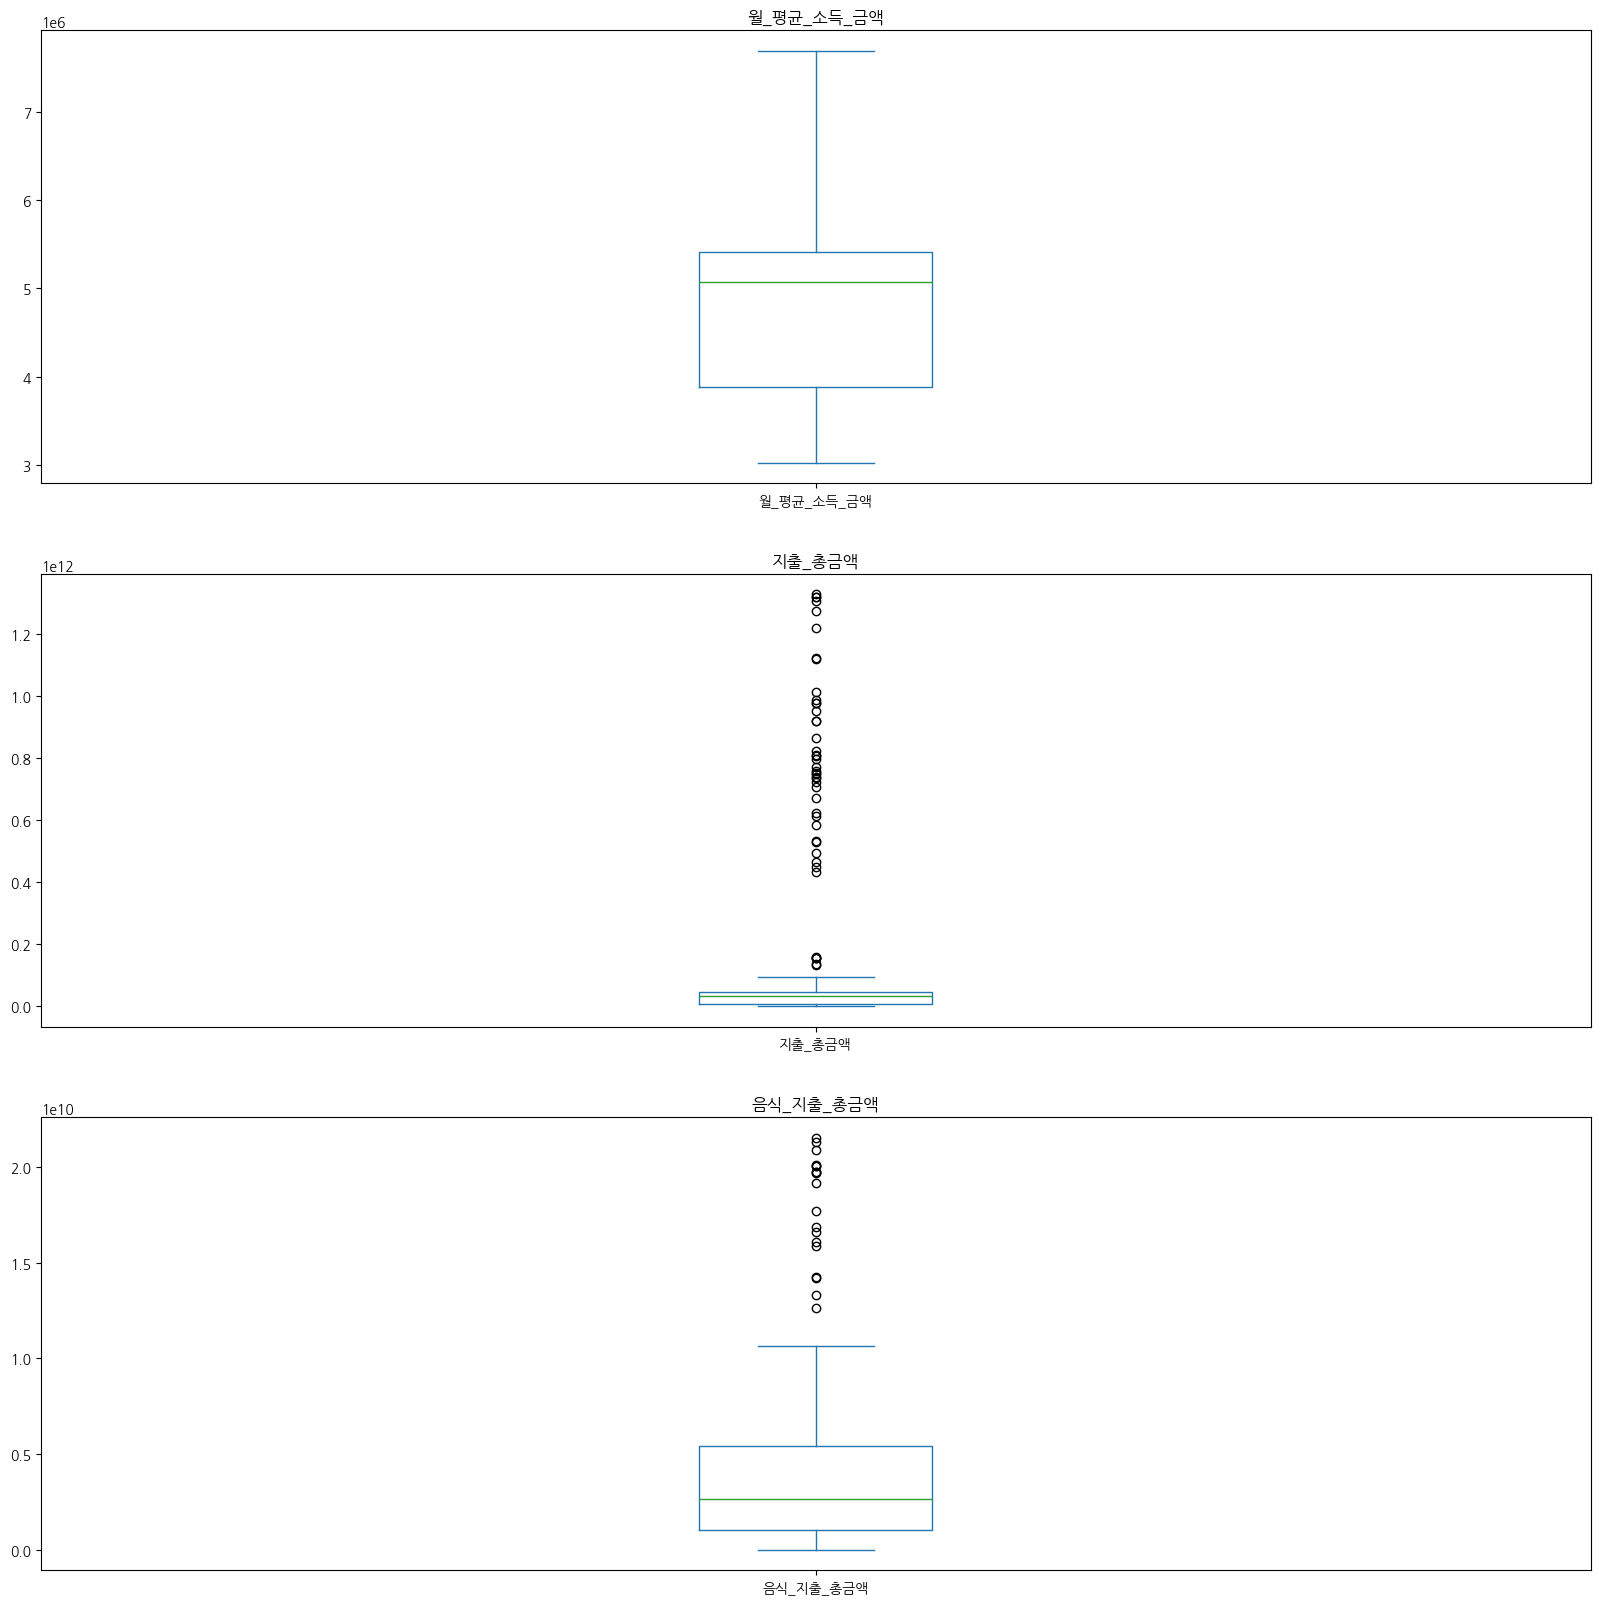

In [106]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,20))

소득소비['월_평균_소득_금액'].plot.box(ax=axes[0], title='월_평균_소득_금액')
소득소비['지출_총금액'].plot.box(ax=axes[1], title='지출_총금액')
소득소비['음식_지출_총금액'].plot.box(ax=axes[2], title='음식_지출_총금액')

plt.show()

이상치 제거

In [107]:
def remove_outliers(df, column):
    
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    outliers = df.loc[condition, :]
    df_clean = df.loc[~condition,:].reset_index(drop=True)
    
    return df_clean, outliers

In [108]:
df_clean , outliers = remove_outliers(소득소비,'지출_총금액')
print(df_clean)

     기준_년분기_코드    행정동_코드 행정동_코드_명  월_평균_소득_금액        지출_총금액   음식_지출_총금액
0        20191  11680690      개포동     3712505  2805396000.0   658155000
1        20191  11680660      개포동     4197165   189850000.0     6638000
2        20191  11680670      개포동     4892097  1485448000.0   334900000
3        20191  11680531      논현동     4160634 21567766000.0  4644390000
4        20191  11680521      논현동     3509309 43794594000.0  5644173000
..         ...       ...      ...         ...           ...         ...
331      20233  11680750      수서동     3847379 95193639000.0  1499541000
332      20233  11680510      신사동     5099915 39359002000.0  7028636000
333      20233  11680545     압구정동     5808537 43401170000.0  8985748000
334      20233  11680730      일원동     3022931  2552402000.0   833488000
335      20233  11680565      청담동     5010204 32575816000.0  5912983000

[336 rows x 6 columns]


In [109]:
# 이상치 모아보기
# 이상치에 역삼동이 너무 많아 제거하기는 어렵다.
print(outliers)

     기준_년분기_코드    행정동_코드 행정동_코드_명  월_평균_소득_금액          지출_총금액    음식_지출_총금액
80       20191  11680580      삼성동     5383113  156866000000.0   5375622000
71       20191  11680640      역삼동     3747340  757310000000.0  20051983000
76       20191  11680650      역삼동     5665510  432179000000.0   3536947000
82       20192  11680580      삼성동     5383113  155916000000.0   5511455000
89       20192  11680650      역삼동     5665510  447533000000.0   3621893000
92       20192  11680640      역삼동     3747340  804686000000.0  20042063000
109      20193  11680580      삼성동     5383113  134760000000.0   5727568000
110      20193  11680650      역삼동     5665510  464846000000.0   3784153000
115      20193  11680640      역삼동     3747340  794793000000.0  21284901000
122      20194  11680580      삼성동     5098096  157136000000.0   6188471000
123      20194  11680650      역삼동     5367397  493280000000.0   3782788000
130      20194  11680640      역삼동     3607265  864675000000.0  21499570000
154      20201  11680580 

이상치 제거후 확인

In [110]:
소득소비_이상치_제거 = df_clean

In [111]:
print(소득소비_이상치_제거.shape)

(336, 6)


In [112]:
print(outliers.shape)

(44, 6)


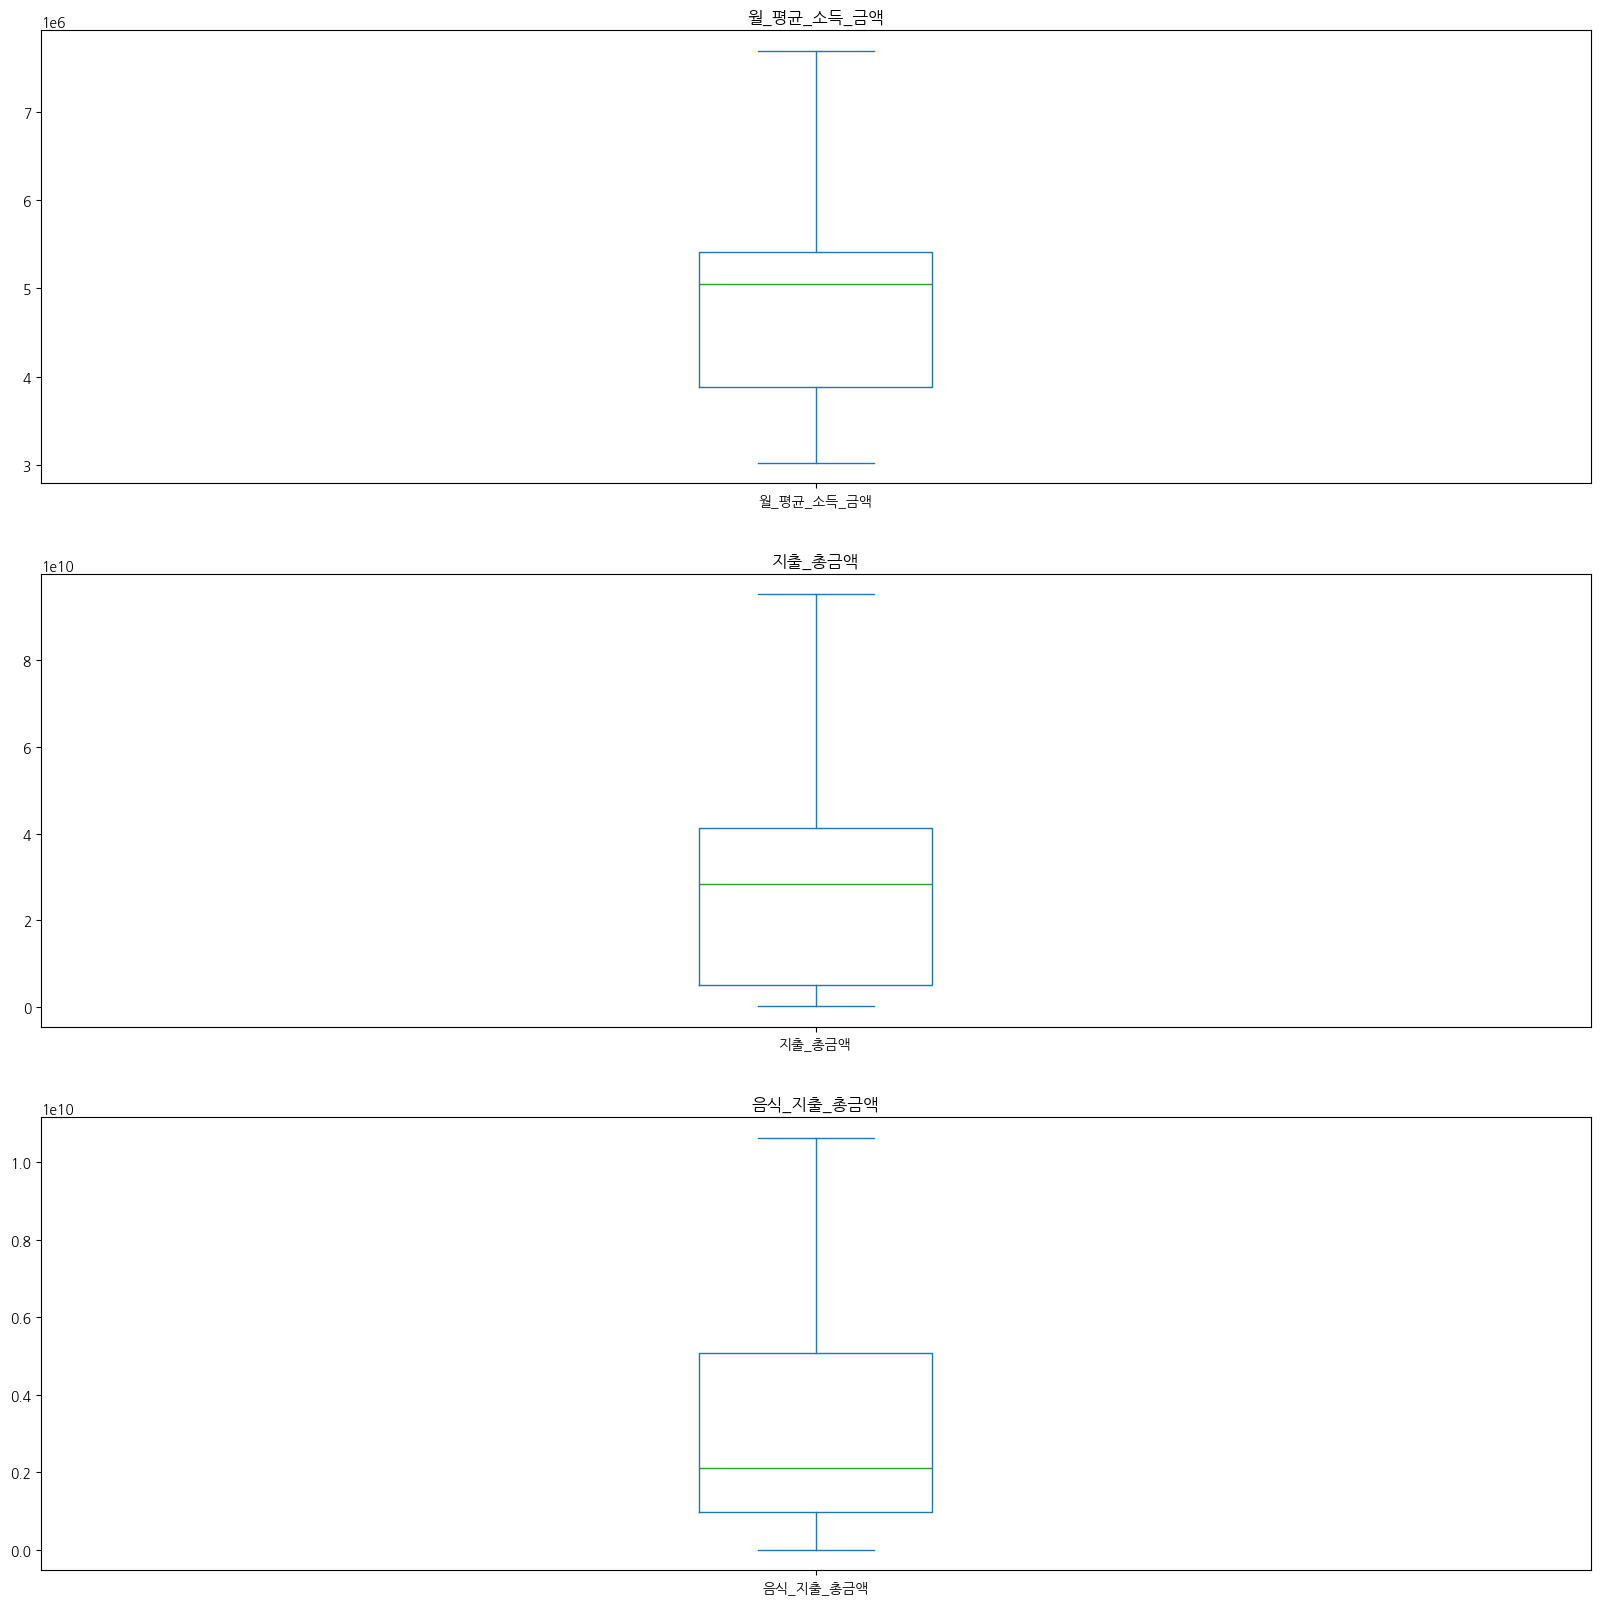

In [113]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,20))

소득소비_이상치_제거['월_평균_소득_금액'].plot.box(ax=axes[0], title='월_평균_소득_금액')
소득소비_이상치_제거['지출_총금액'].plot.box(ax=axes[1], title='지출_총금액')
소득소비_이상치_제거['음식_지출_총금액'].plot.box(ax=axes[2], title='음식_지출_총금액')

plt.show()

In [114]:
# 역삼동이 없어져버렸다...
소득소비_이상치_제거[소득소비_이상치_제거['행정동_코드_명'].isin(['역삼동'])]

,기준_년분기_코드,행정동_코드,행정동_코드_명,월_평균_소득_금액,지출_총금액,음식_지출_총금액


# 시각화

이상치 제거 전 데이터(소득소비.df) 시각화 

- 이상치 제거 전 데이터 : 소득소비.df
- 이상치 제거 후 데이터 : 소득소비.df.wout

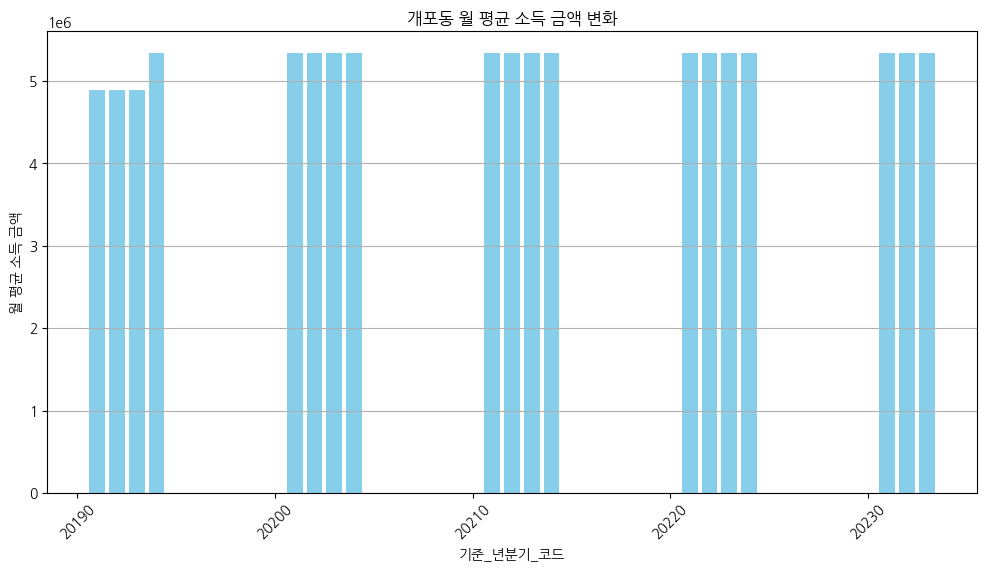

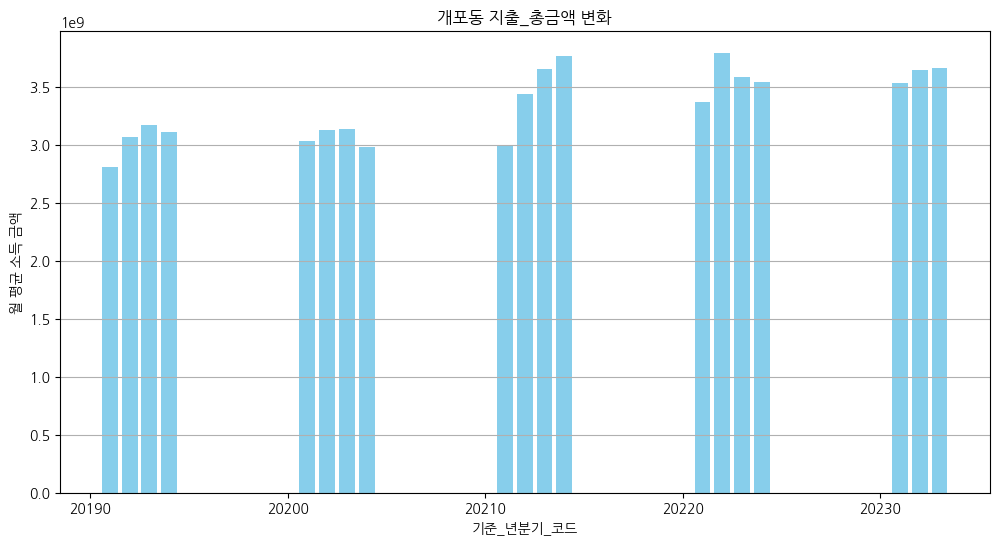

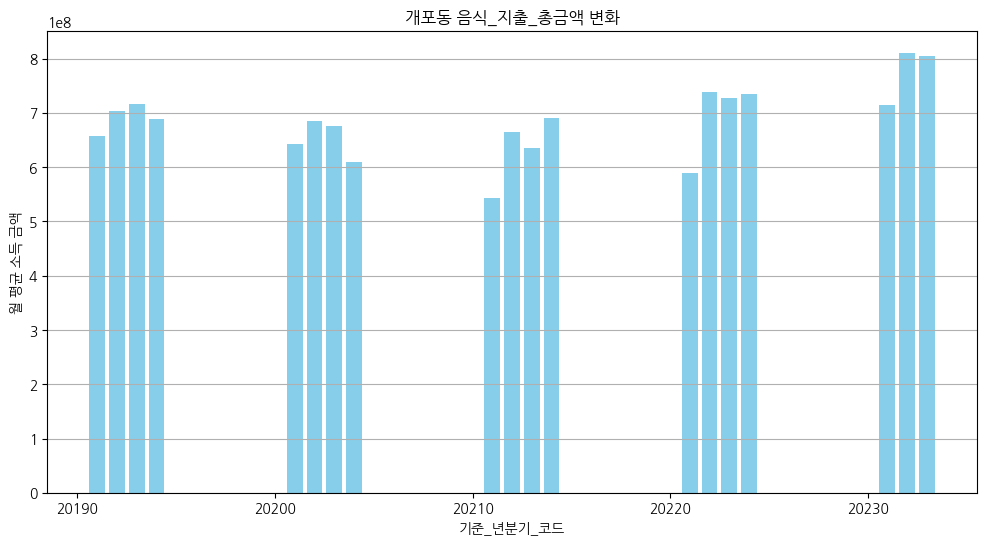

In [115]:
개포동_소득소비 = 소득소비[소득소비['행정동_코드_명'] == '개포동']



# 그래프
plt.figure(figsize=(12, 6))
plt.bar(개포동_소득소비['기준_년분기_코드'], 개포동_소득소비['월_평균_소득_금액'], color='skyblue')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('개포동 월 평균 소득 금액 변화')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(개포동_소득소비['기준_년분기_코드'],개포동_소득소비['지출_총금액'], color='skyblue')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('개포동 지출_총금액 변화')
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(개포동_소득소비['기준_년분기_코드'],개포동_소득소비['음식_지출_총금액'], color='skyblue')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('개포동 음식_지출_총금액 변화')
plt.grid(axis='y')
plt.show()

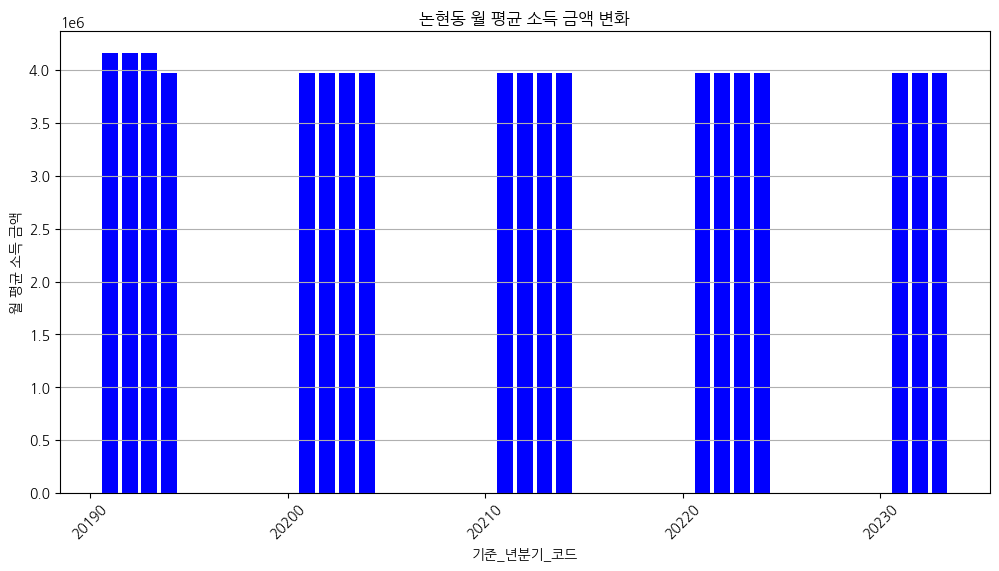

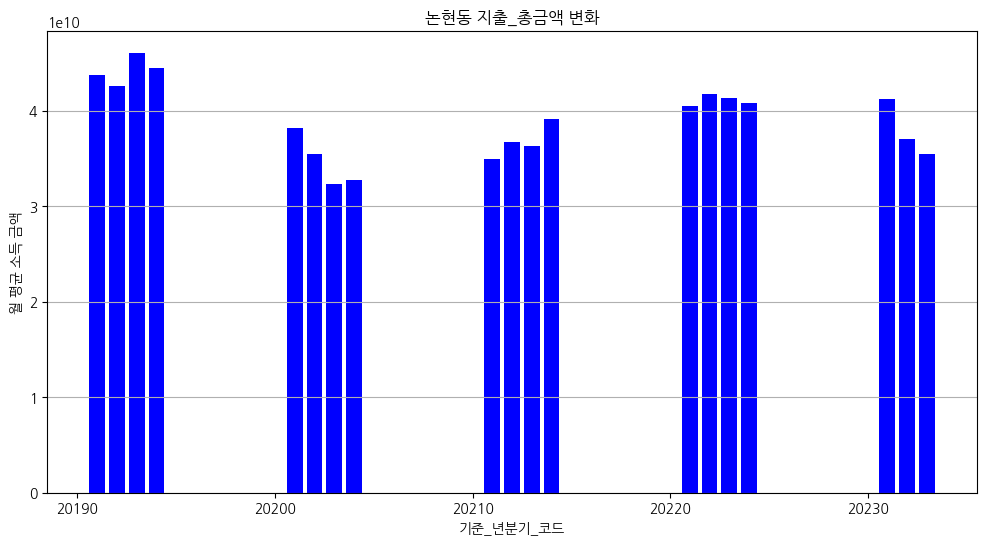

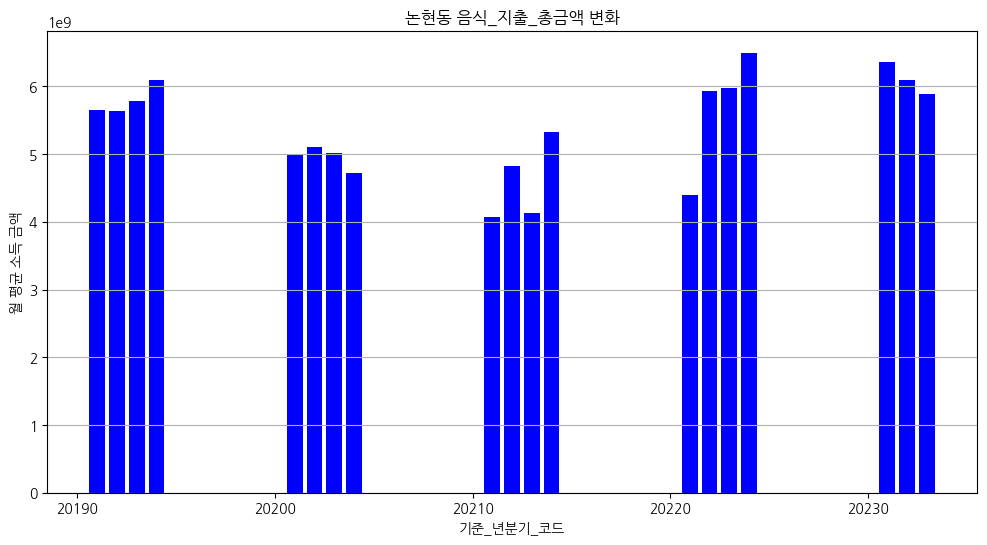

In [116]:
논현동_소득소비 = 소득소비[소득소비['행정동_코드_명'] == '논현동']



# 그래프
plt.figure(figsize=(12, 6))
plt.bar(논현동_소득소비['기준_년분기_코드'], 논현동_소득소비['월_평균_소득_금액'], color='blue')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('논현동 월 평균 소득 금액 변화')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(논현동_소득소비['기준_년분기_코드'],논현동_소득소비['지출_총금액'], color='blue')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('논현동 지출_총금액 변화')
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(논현동_소득소비['기준_년분기_코드'],논현동_소득소비['음식_지출_총금액'], color='blue')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('논현동 음식_지출_총금액 변화')
plt.grid(axis='y')
plt.show()

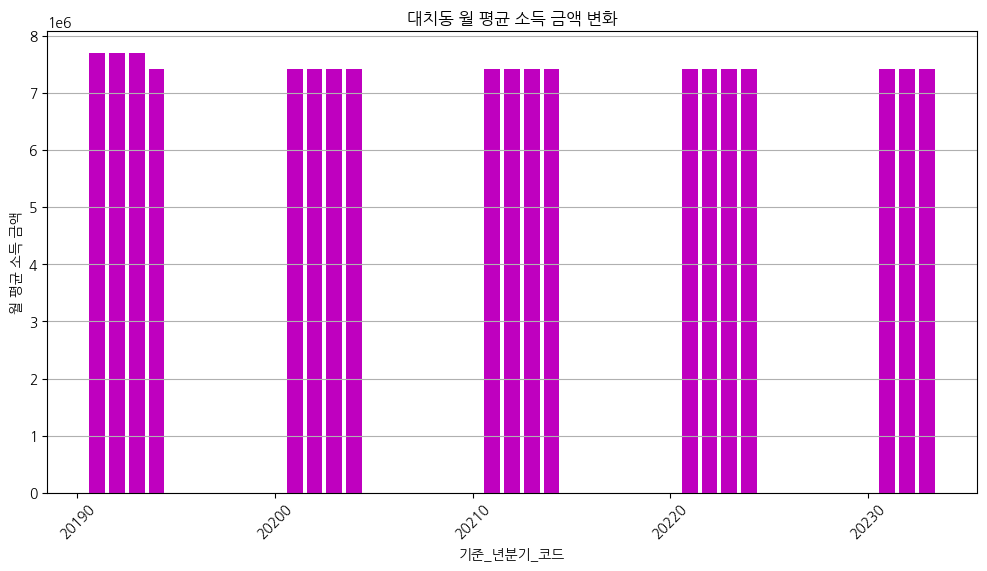

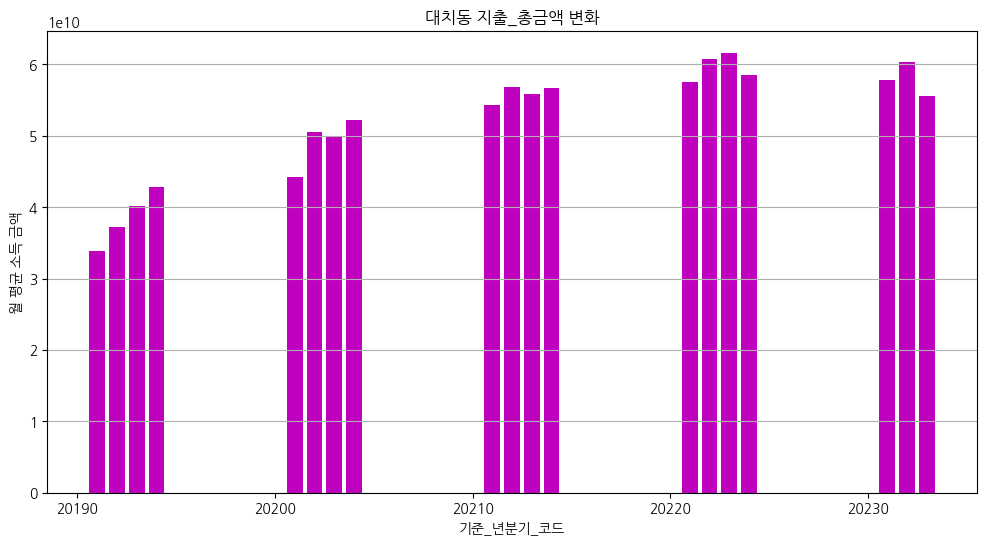

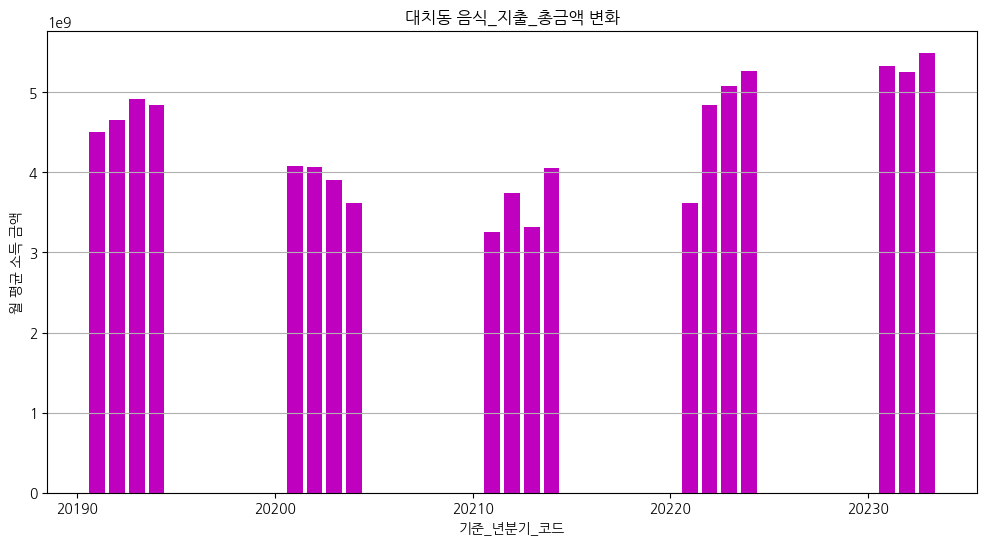

In [117]:
대치동_소득소비 = 소득소비[소득소비['행정동_코드_명'] == '대치동']



# 그래프
plt.figure(figsize=(12, 6))
plt.bar(대치동_소득소비['기준_년분기_코드'], 대치동_소득소비['월_평균_소득_금액'], color='m')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('대치동 월 평균 소득 금액 변화')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(대치동_소득소비['기준_년분기_코드'],대치동_소득소비['지출_총금액'], color='m')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('대치동 지출_총금액 변화')
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(대치동_소득소비['기준_년분기_코드'],대치동_소득소비['음식_지출_총금액'], color='m')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('대치동 음식_지출_총금액 변화')
plt.grid(axis='y')
plt.show()

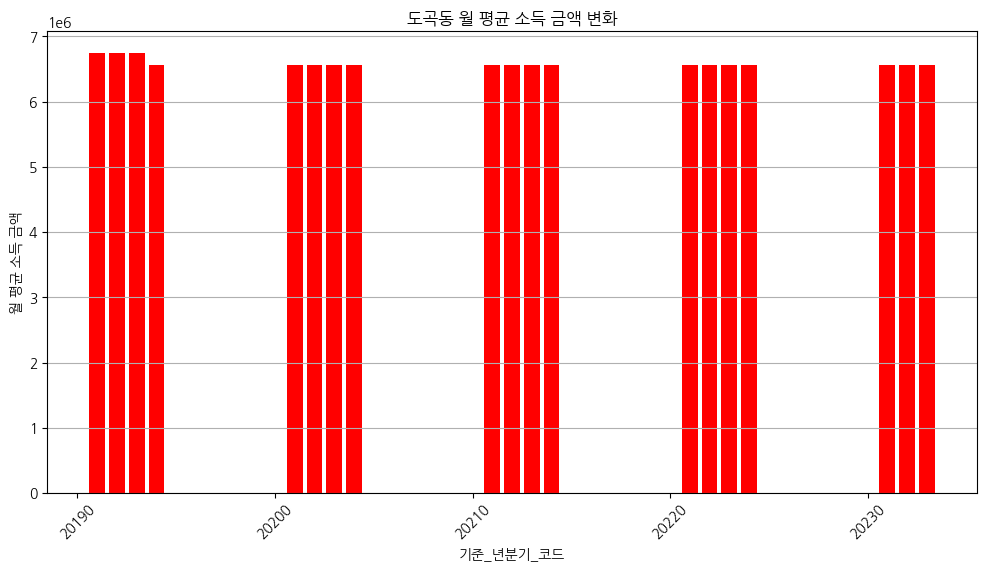

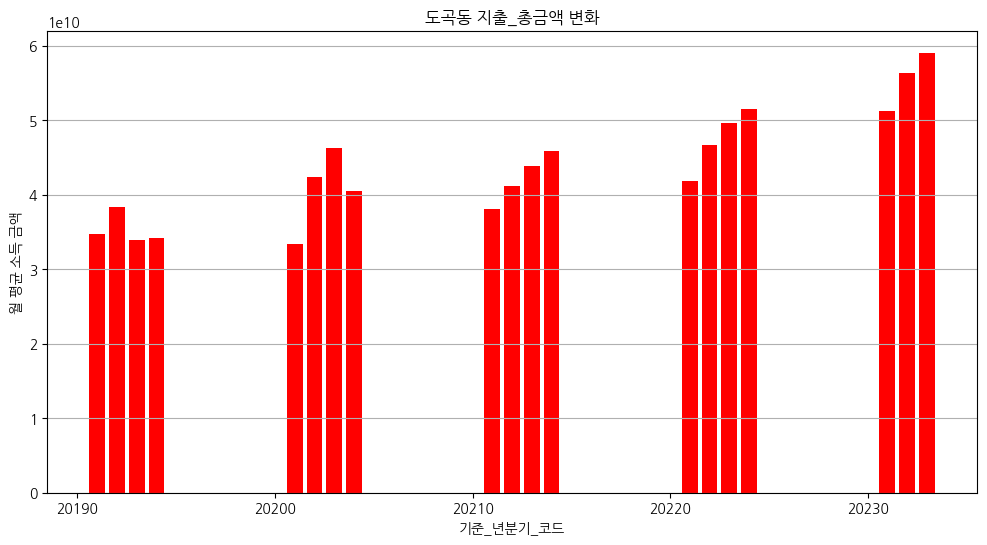

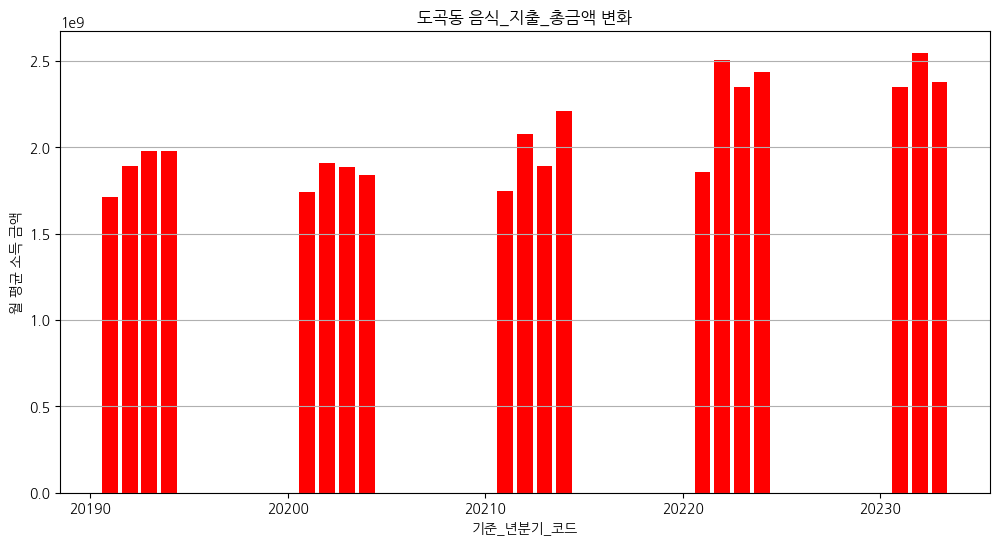

In [118]:
도곡동_소득소비 = 소득소비[소득소비['행정동_코드_명'] == '도곡동']



# 그래프
plt.figure(figsize=(12, 6))
plt.bar(도곡동_소득소비['기준_년분기_코드'], 도곡동_소득소비['월_평균_소득_금액'], color='r')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('도곡동 월 평균 소득 금액 변화')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(도곡동_소득소비['기준_년분기_코드'],도곡동_소득소비['지출_총금액'], color='r')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('도곡동 지출_총금액 변화')
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(도곡동_소득소비['기준_년분기_코드'],도곡동_소득소비['음식_지출_총금액'], color='r')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('도곡동 음식_지출_총금액 변화')
plt.grid(axis='y')
plt.show()

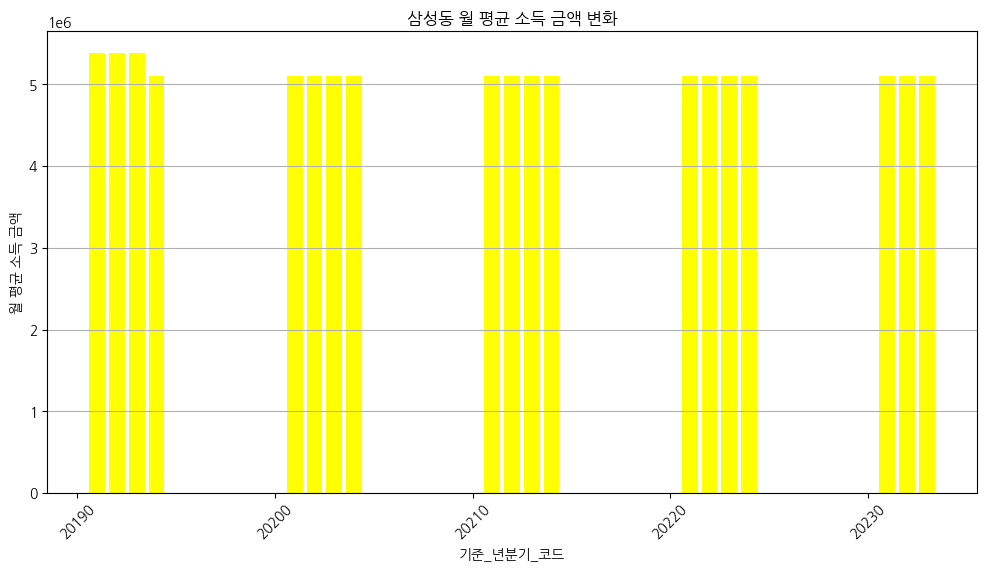

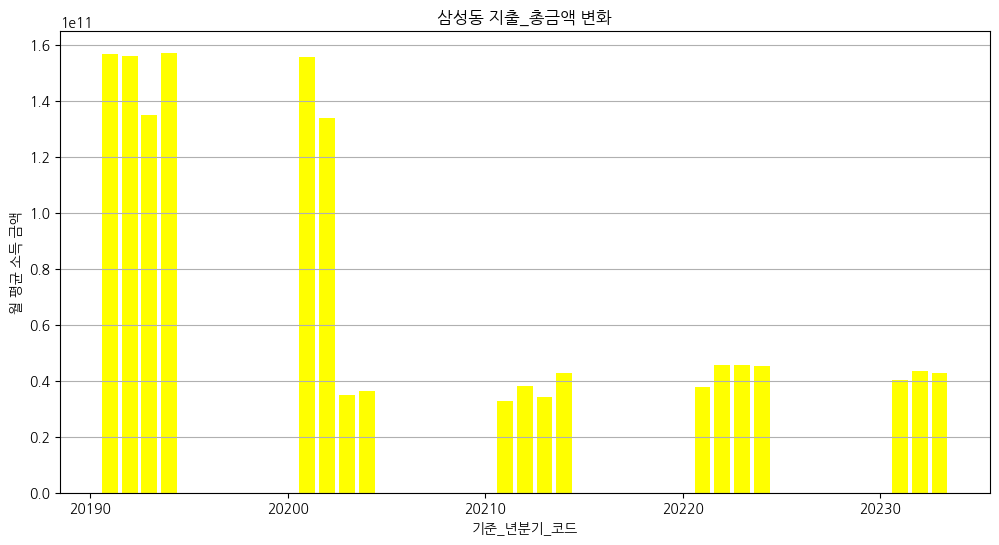

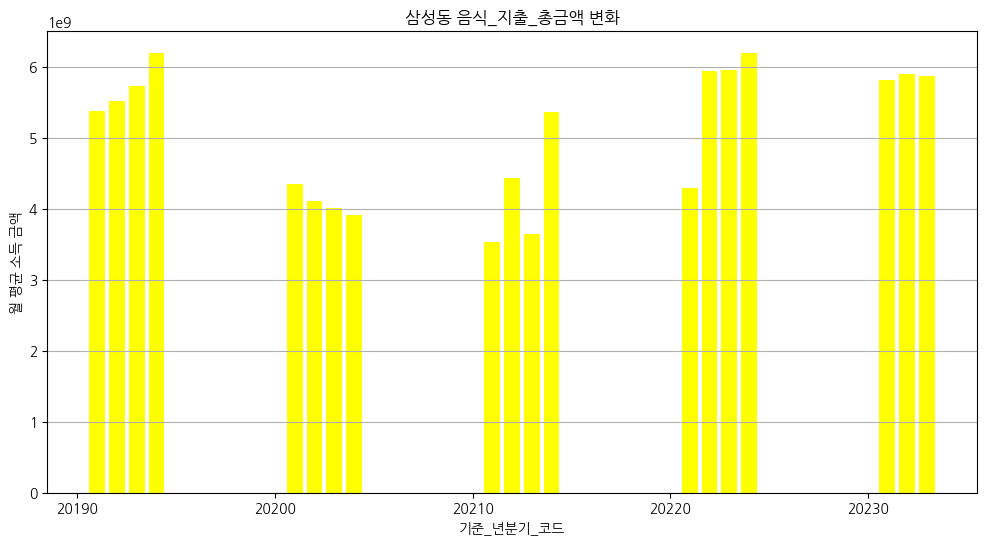

In [119]:
삼성동_소득소비 = 소득소비[소득소비['행정동_코드_명'] == '삼성동']



# 그래프
plt.figure(figsize=(12, 6))
plt.bar(삼성동_소득소비['기준_년분기_코드'], 삼성동_소득소비['월_평균_소득_금액'], color='yellow')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('삼성동 월 평균 소득 금액 변화')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(삼성동_소득소비['기준_년분기_코드'],삼성동_소득소비['지출_총금액'], color='yellow')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('삼성동 지출_총금액 변화')
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(삼성동_소득소비['기준_년분기_코드'],삼성동_소득소비['음식_지출_총금액'], color='yellow')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('삼성동 음식_지출_총금액 변화')
plt.grid(axis='y')
plt.show()

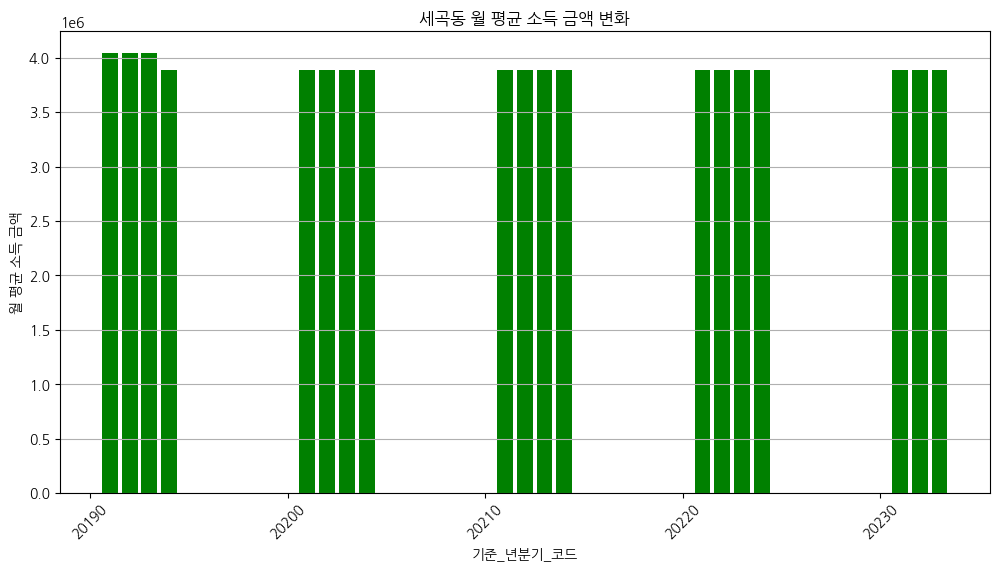

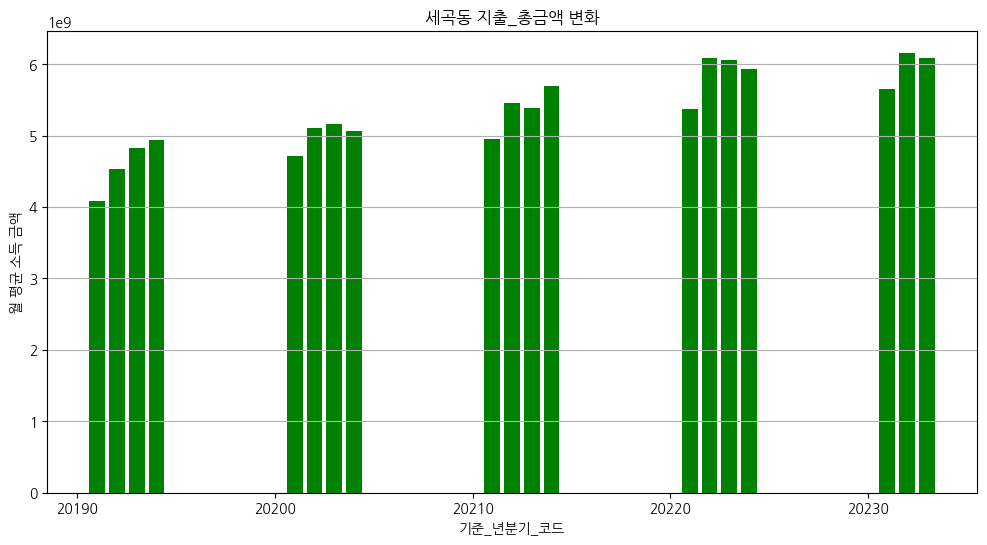

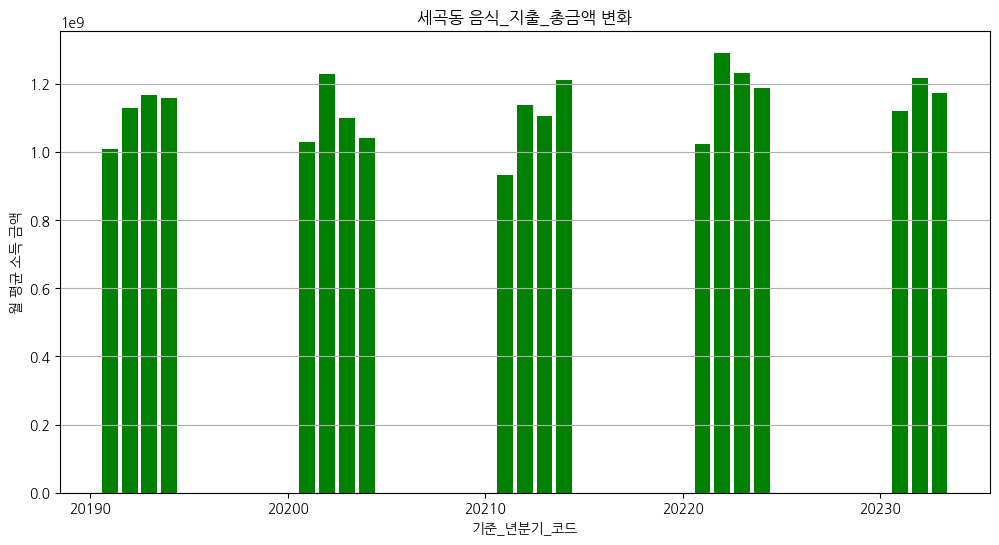

In [120]:
세곡동_소득소비 = 소득소비[소득소비['행정동_코드_명'] == '세곡동']



# 그래프
plt.figure(figsize=(12, 6))
plt.bar(세곡동_소득소비['기준_년분기_코드'], 세곡동_소득소비['월_평균_소득_금액'], color='g')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('세곡동 월 평균 소득 금액 변화')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(세곡동_소득소비['기준_년분기_코드'],세곡동_소득소비['지출_총금액'], color='g')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('세곡동 지출_총금액 변화')
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(세곡동_소득소비['기준_년분기_코드'],세곡동_소득소비['음식_지출_총금액'], color='g')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('세곡동 음식_지출_총금액 변화')
plt.grid(axis='y')
plt.show()

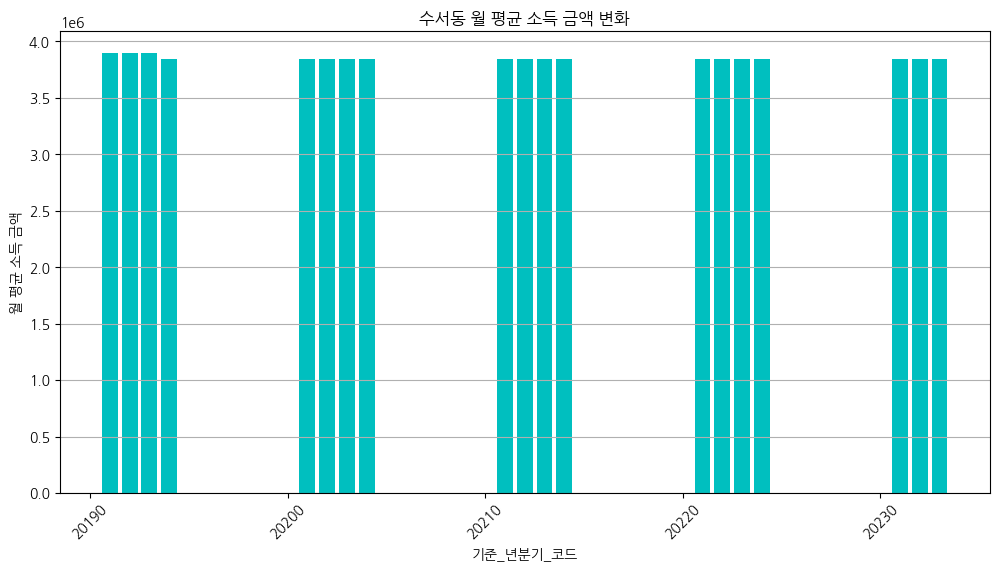

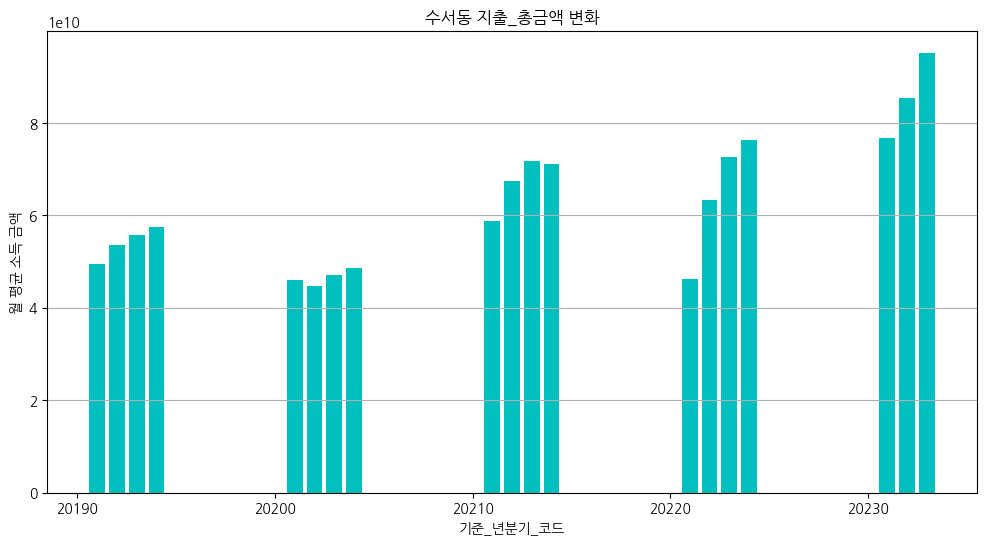

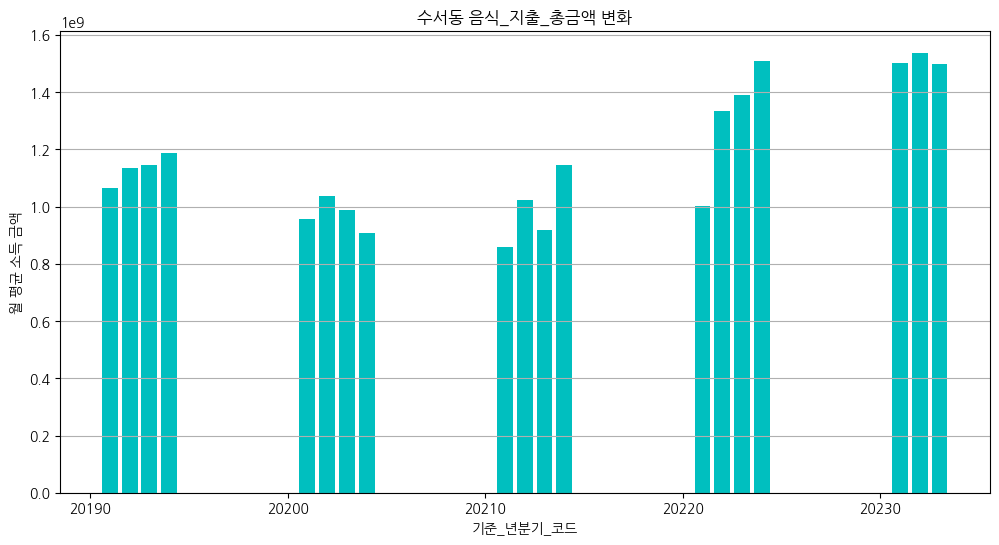

In [121]:
수서동_소득소비 = 소득소비[소득소비['행정동_코드_명'] == '수서동']



# 그래프
plt.figure(figsize=(12, 6))
plt.bar(수서동_소득소비['기준_년분기_코드'], 수서동_소득소비['월_평균_소득_금액'], color='c')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('수서동 월 평균 소득 금액 변화')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(수서동_소득소비['기준_년분기_코드'],수서동_소득소비['지출_총금액'], color='c')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('수서동 지출_총금액 변화')
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(수서동_소득소비['기준_년분기_코드'],수서동_소득소비['음식_지출_총금액'], color='c')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('수서동 음식_지출_총금액 변화')
plt.grid(axis='y')
plt.show()

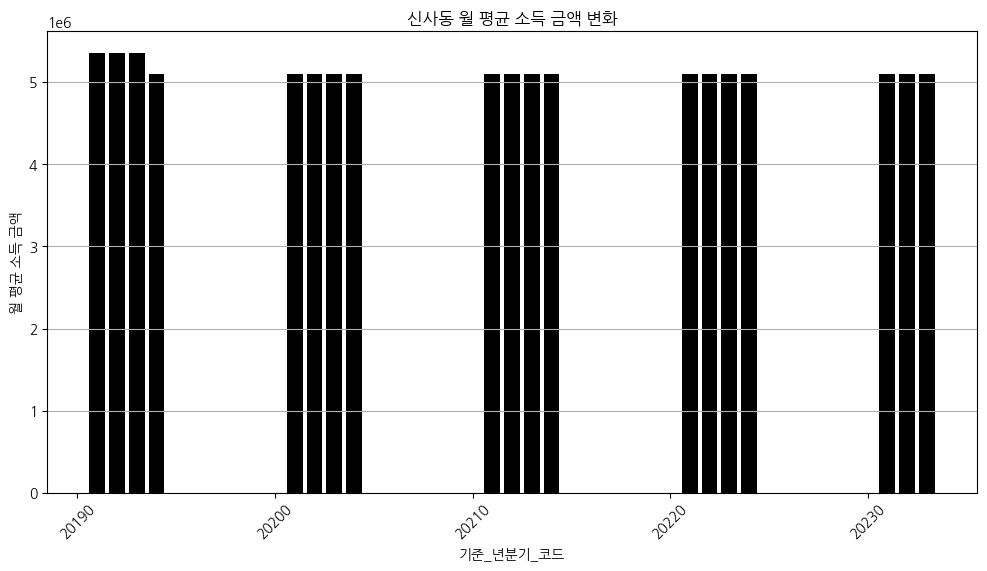

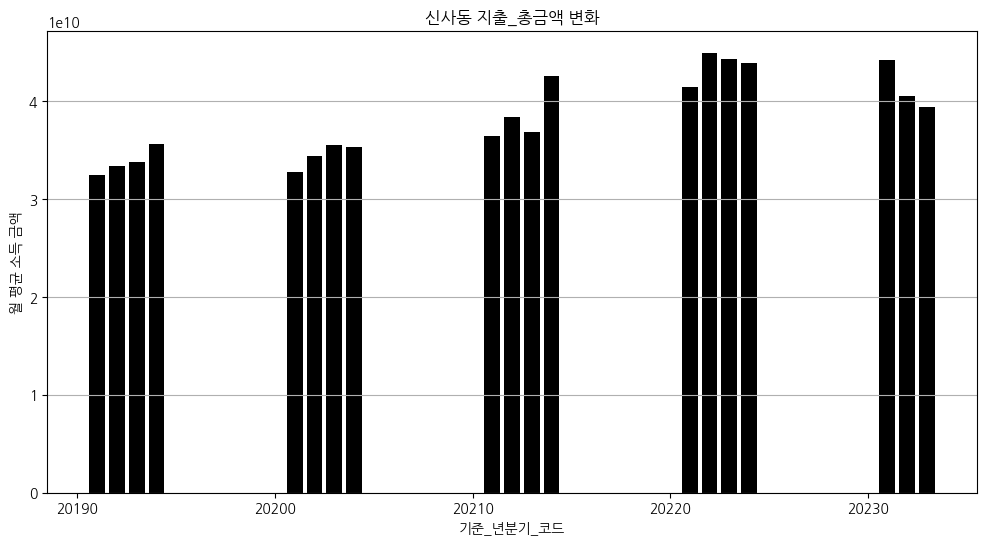

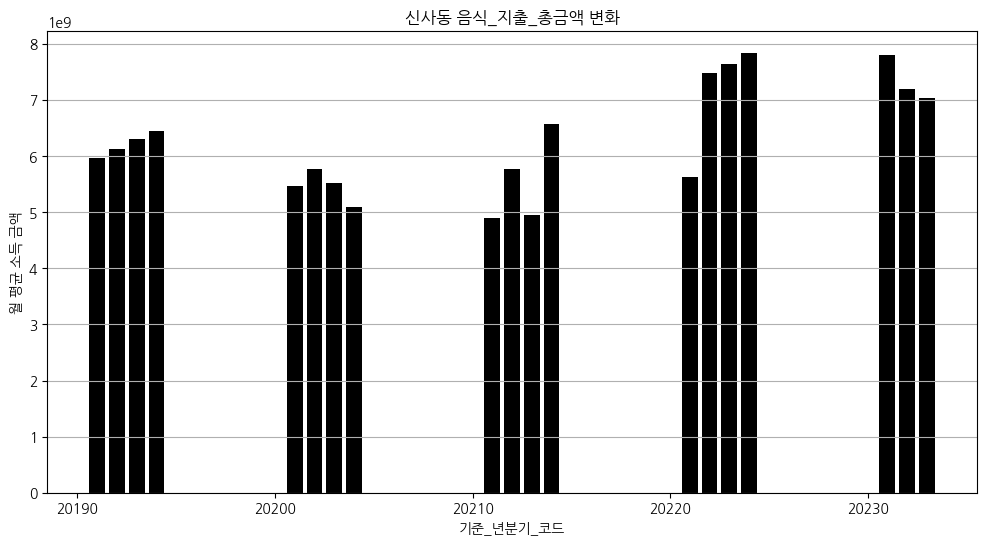

In [122]:
신사동_소득소비 = 소득소비[소득소비['행정동_코드_명'] == '신사동']



# 그래프
plt.figure(figsize=(12, 6))
plt.bar(신사동_소득소비['기준_년분기_코드'], 신사동_소득소비['월_평균_소득_금액'], color='k')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('신사동 월 평균 소득 금액 변화')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(신사동_소득소비['기준_년분기_코드'],신사동_소득소비['지출_총금액'], color='k')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('신사동 지출_총금액 변화')
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(신사동_소득소비['기준_년분기_코드'],신사동_소득소비['음식_지출_총금액'], color='k')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('신사동 음식_지출_총금액 변화')
plt.grid(axis='y')
plt.show()

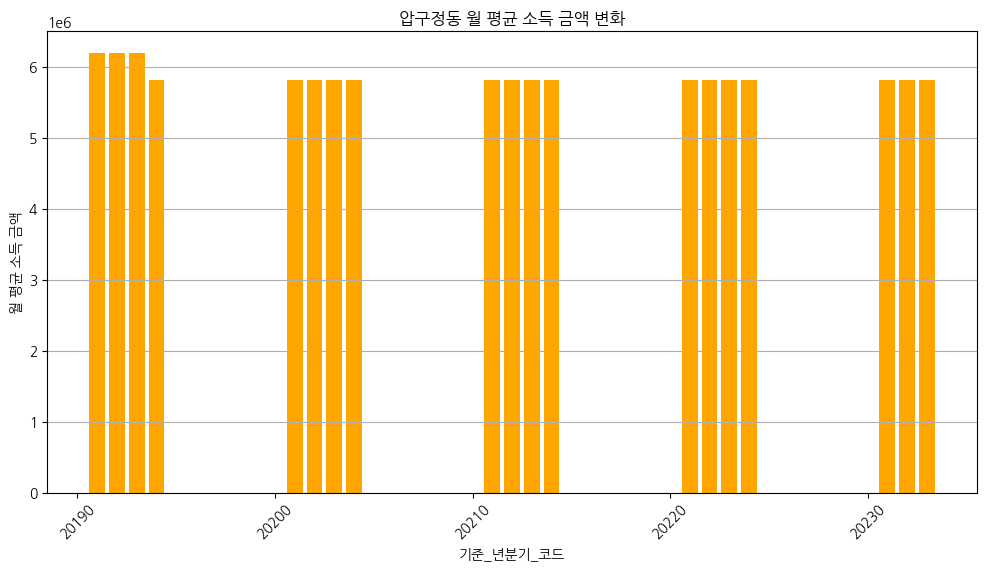

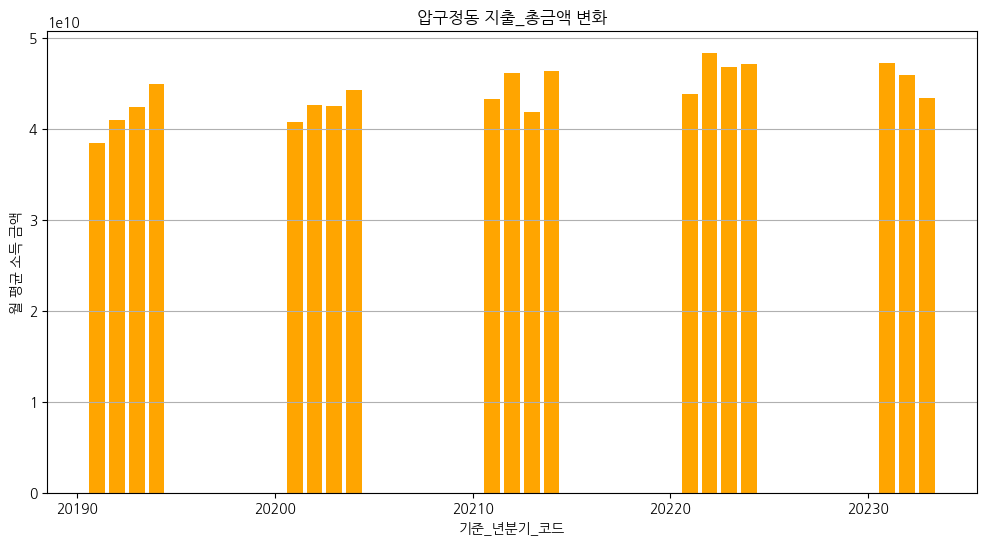

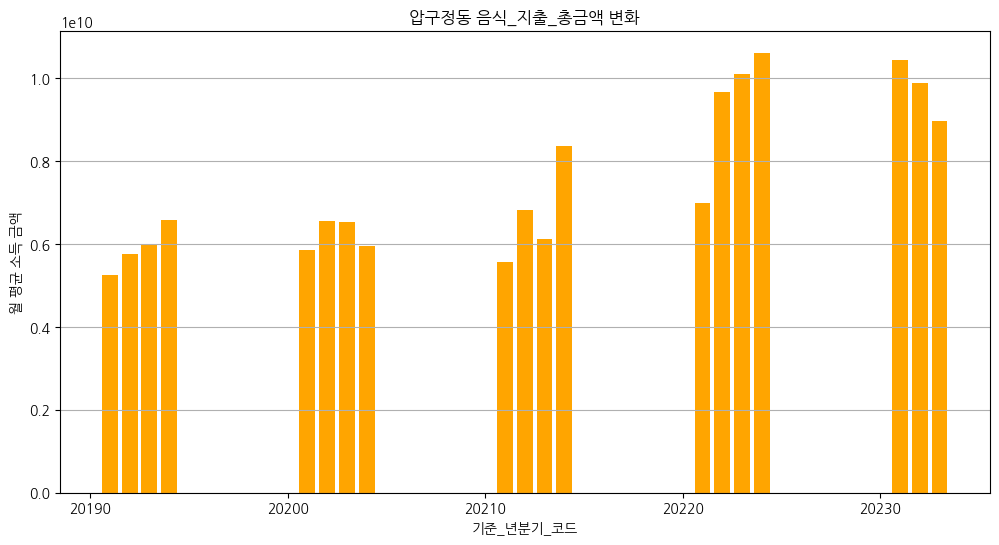

In [123]:
압구정동_소득소비 = 소득소비[소득소비['행정동_코드_명'] == '압구정동']



# 그래프
plt.figure(figsize=(12, 6))
plt.bar(압구정동_소득소비['기준_년분기_코드'], 압구정동_소득소비['월_평균_소득_금액'], color='orange')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('압구정동 월 평균 소득 금액 변화')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(압구정동_소득소비['기준_년분기_코드'],압구정동_소득소비['지출_총금액'], color='orange')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('압구정동 지출_총금액 변화')
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(압구정동_소득소비['기준_년분기_코드'],압구정동_소득소비['음식_지출_총금액'], color='orange')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('압구정동 음식_지출_총금액 변화')
plt.grid(axis='y')
plt.show()

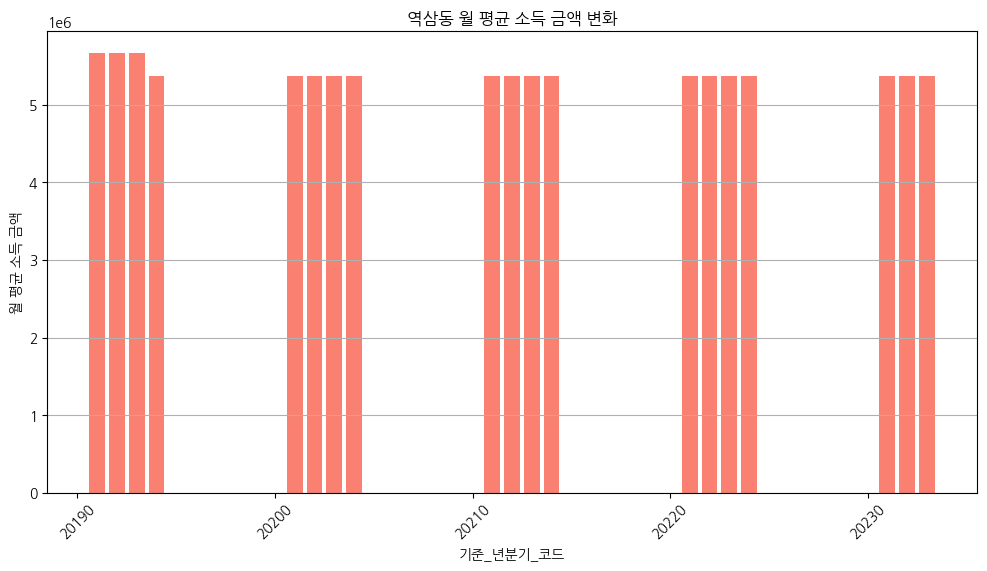

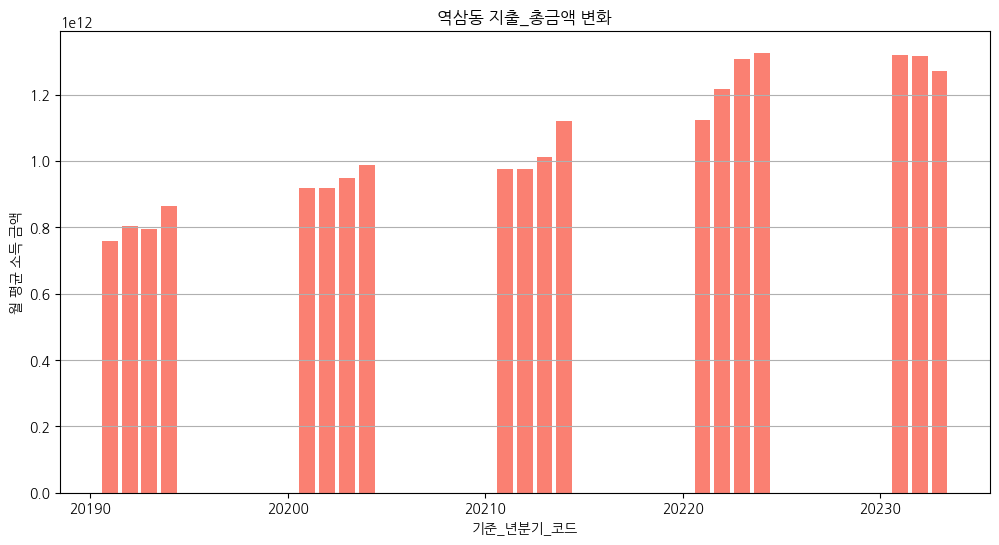

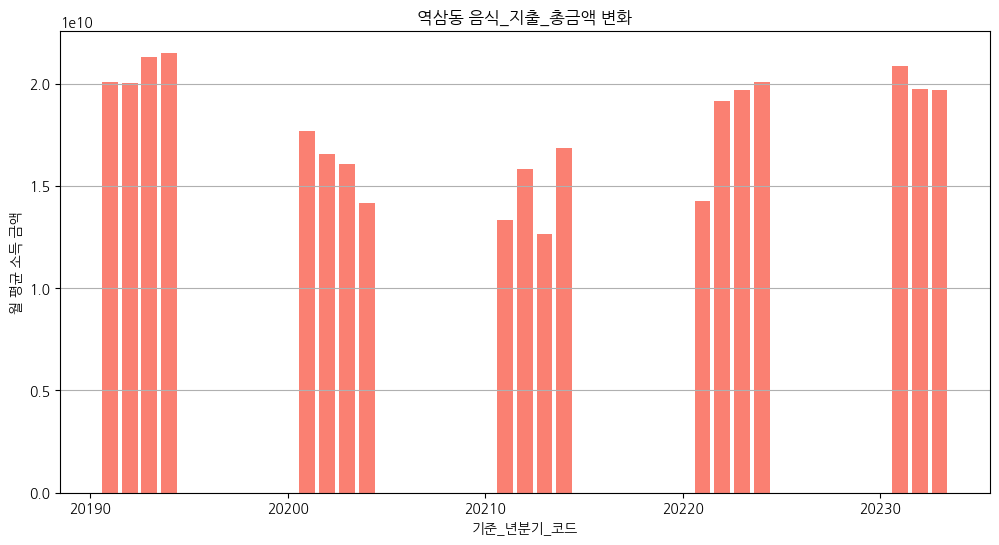

In [124]:
삼성동_소득소비 = 소득소비[소득소비['행정동_코드_명'] == '역삼동']



# 그래프
plt.figure(figsize=(12, 6))
plt.bar(삼성동_소득소비['기준_년분기_코드'], 삼성동_소득소비['월_평균_소득_금액'], color='salmon')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('역삼동 월 평균 소득 금액 변화')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(삼성동_소득소비['기준_년분기_코드'],삼성동_소득소비['지출_총금액'], color='salmon')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('역삼동 지출_총금액 변화')
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(삼성동_소득소비['기준_년분기_코드'],삼성동_소득소비['음식_지출_총금액'], color='salmon')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('역삼동 음식_지출_총금액 변화')
plt.grid(axis='y')
plt.show()

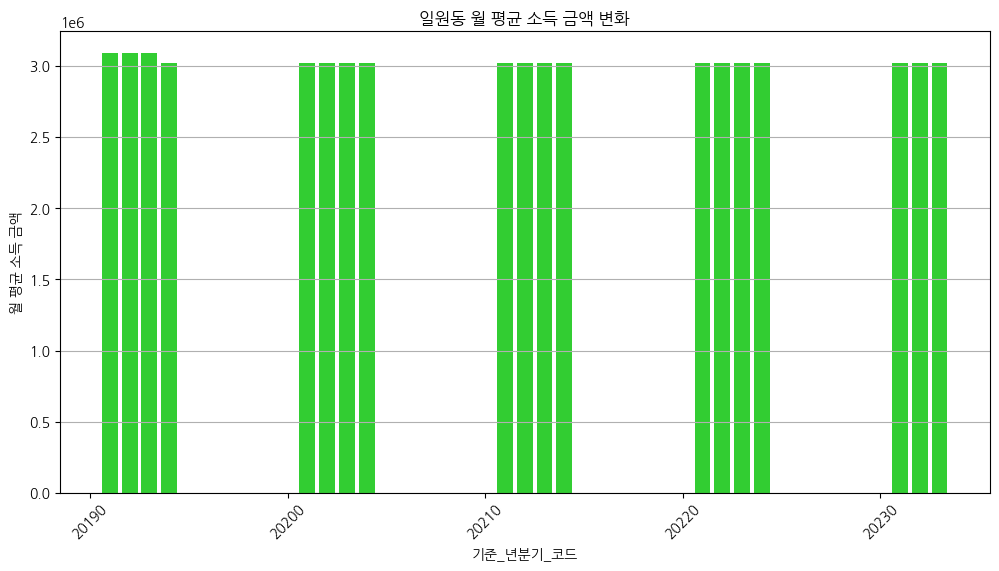

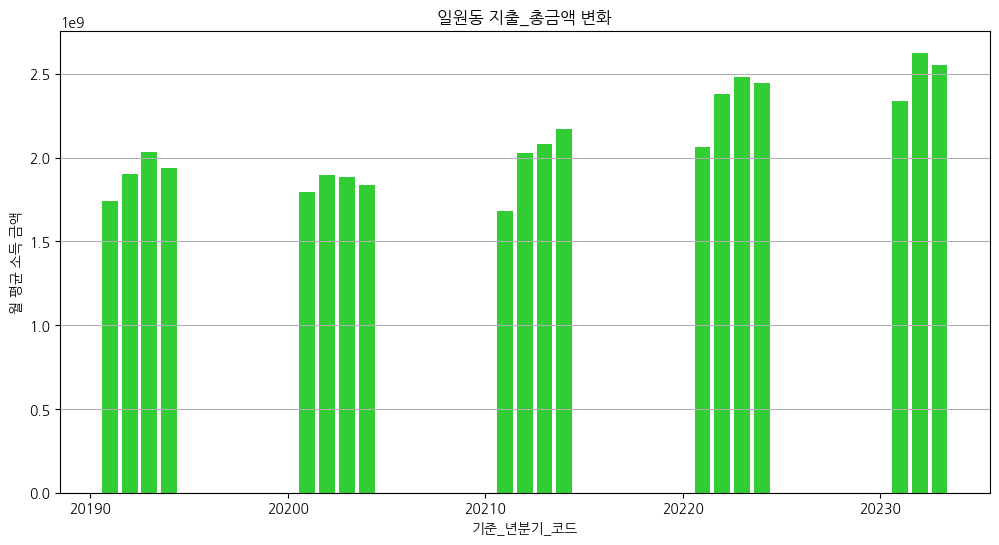

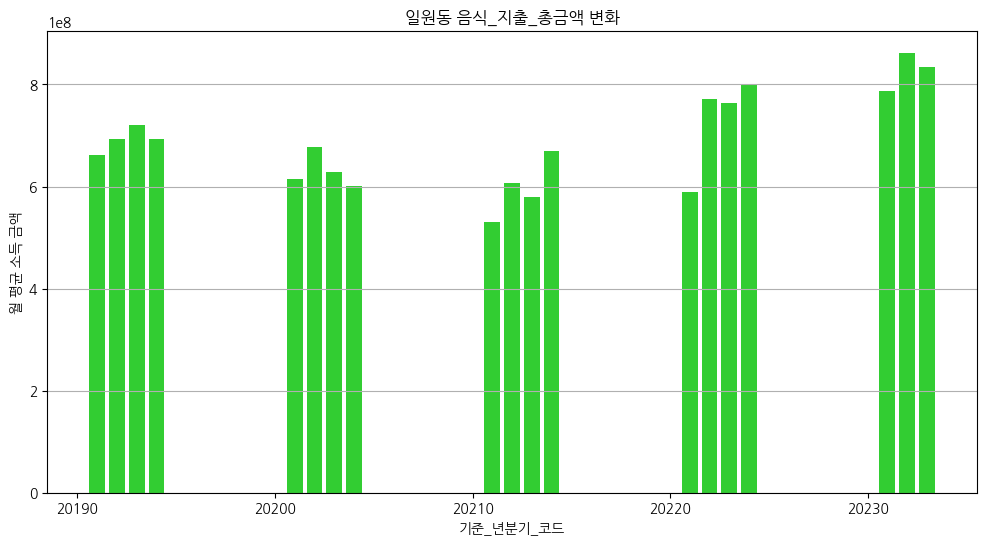

In [125]:
일원동_소득소비 = 소득소비[소득소비['행정동_코드_명'] == '일원동']



# 그래프
plt.figure(figsize=(12, 6))
plt.bar(일원동_소득소비['기준_년분기_코드'], 일원동_소득소비['월_평균_소득_금액'], color='limegreen')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('일원동 월 평균 소득 금액 변화')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(일원동_소득소비['기준_년분기_코드'],일원동_소득소비['지출_총금액'], color='limegreen')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('일원동 지출_총금액 변화')
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(일원동_소득소비['기준_년분기_코드'],일원동_소득소비['음식_지출_총금액'], color='limegreen')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('일원동 음식_지출_총금액 변화')
plt.grid(axis='y')
plt.show()

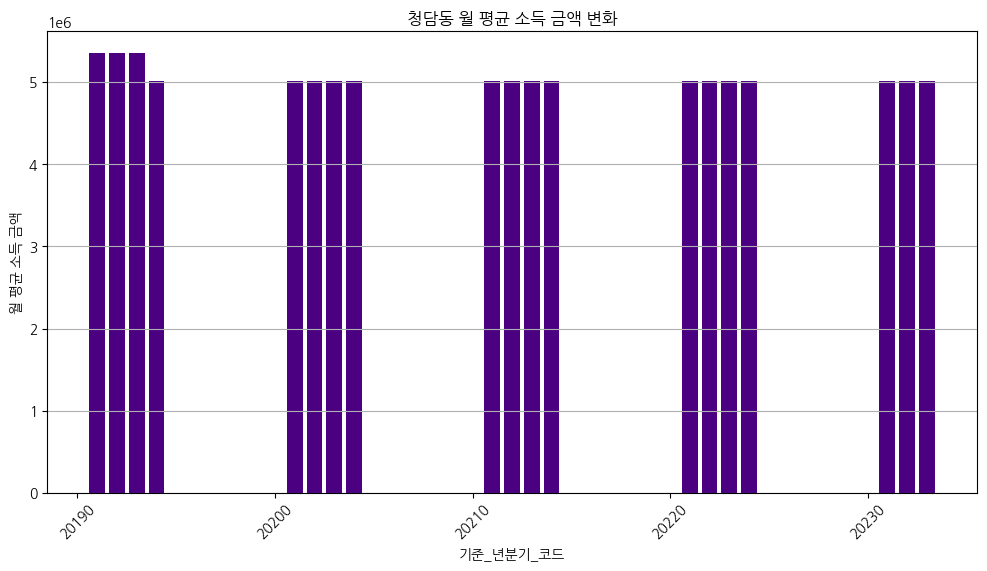

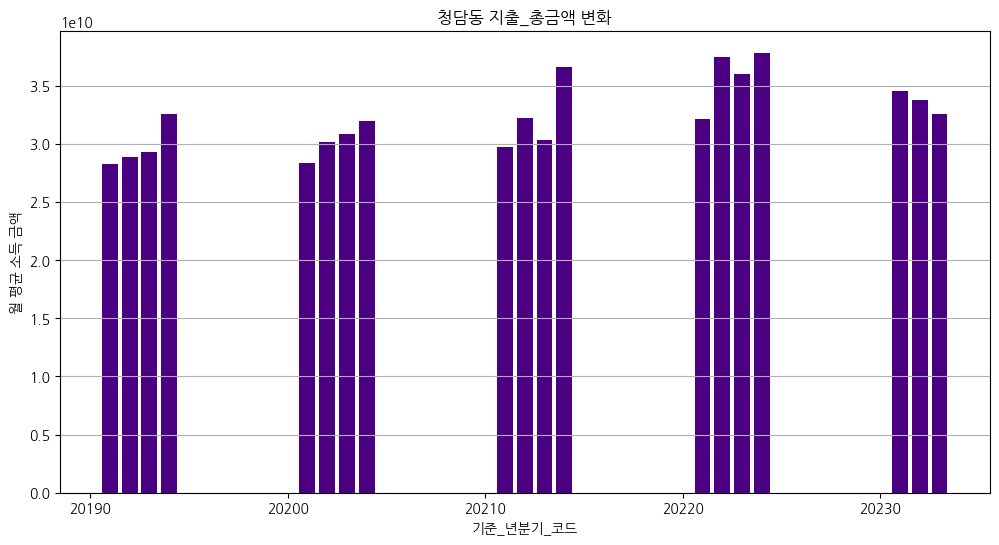

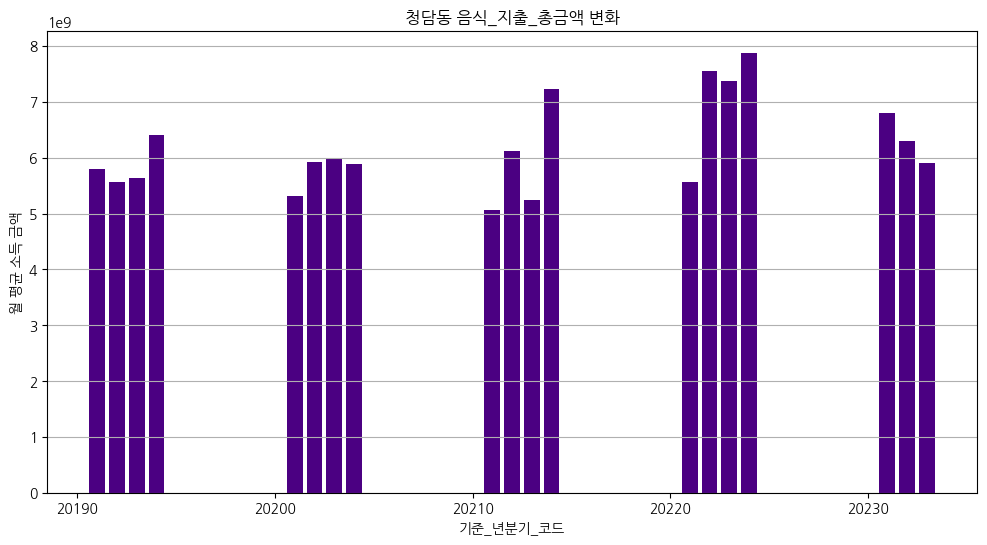

In [126]:
청담동_소득소비 = 소득소비[소득소비['행정동_코드_명'] == '청담동']



# 그래프
plt.figure(figsize=(12, 6))
plt.bar(청담동_소득소비['기준_년분기_코드'], 청담동_소득소비['월_평균_소득_금액'], color='indigo')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('청담동 월 평균 소득 금액 변화')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(청담동_소득소비['기준_년분기_코드'],청담동_소득소비['지출_총금액'], color='indigo')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('청담동 지출_총금액 변화')
plt.grid(axis='y')
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(청담동_소득소비['기준_년분기_코드'],청담동_소득소비['음식_지출_총금액'], color='indigo')
plt.xlabel('기준_년분기_코드')
plt.ylabel('월 평균 소득 금액')
plt.title('청담동 음식_지출_총금액 변화')
plt.grid(axis='y')
plt.show()